# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "curse of dimensionality"? What does it mean in practice?

**Question** How can we reduce the number of attributes in classification problems?


Download file seizure.csv containing information about the recording of brain activity of people (description of the dataset: https://archive.ics.uci.edu/dataset/388/epileptic+seizure+recognition).
Each row contains 178 subsequent EEG measurements conducted during 1 second (column), the last column represents the label y {1,2,3,4,5} (subjects in class 1 have epileptic seizure, other classes represent different control groups, such as eyes open (5), or eyes closed (4)).

The train and test split and normalization is already done. 
Your task is to classify the given data with k-NN with k=3 (as during previous laboratories) and measure the accuracy.

Next, try to eliminate redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data = pd.read_csv("dane/seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
#TODO you are given data in X_train, X_test, y_train, y_test variables
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)



0.4785243741765481

In [3]:
best = SelectKBest(mutual_info_classif, k=30)
X_train_reduced = best.fit_transform(X_train, y_train)
X_test_reduced = best.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_reduced, y_train)

y_pred = knn.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.48695652173913045

In the exercise above we set the number of features arbitrarily. 

**Question** How can we find the optimal number of attributes in machine learning problems?

# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

**Question** What clustering algorithms do you know?

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

**Question** How can we choose the initial clusters?


**Exercise**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?

**Question** What advantages and disadvantages of k-means clustering can you find?

# 4. K-means with scikit-learn

### 4.1. Download files mouse.csv and lines.csv. They have multiple examples described with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

In [4]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.show()

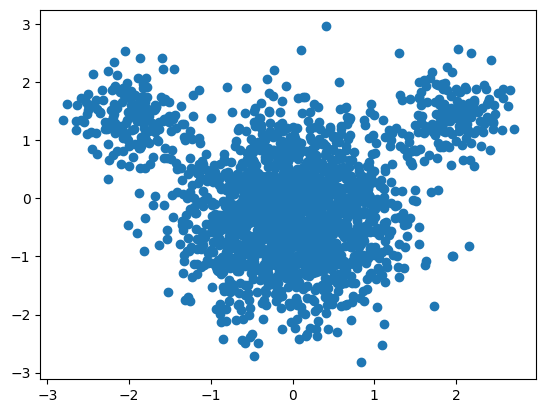

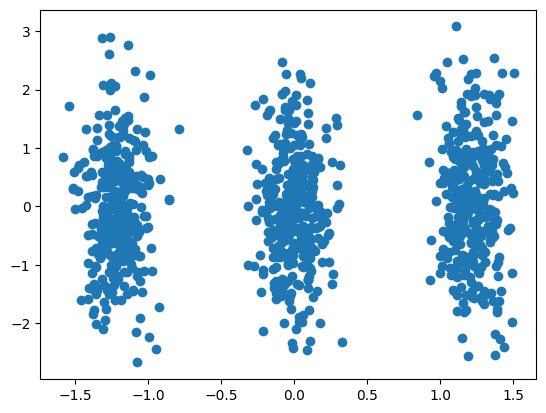

In [5]:
# TODO call functions above and try to find clusters in obtained datasets
mouse_data = read_file('dane/mouse.csv')
lines_data = read_file('dane/lines.csv')
plot_data(mouse_data)
plot_data(lines_data)

### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in the previous exercise.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [6]:
def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()

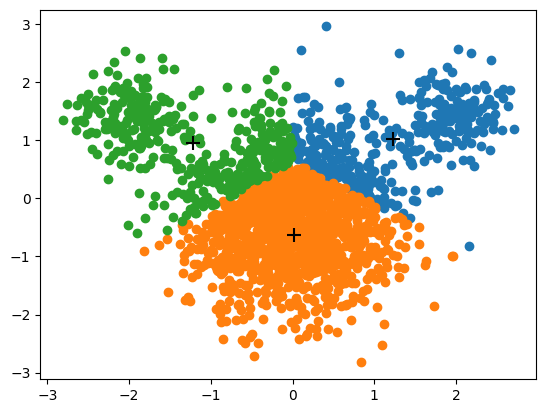

In [7]:
from sklearn.cluster import KMeans
# TODO use KMeans to cluster mouse and lines. Visualize and analyze the obtained clusters.
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters).fit(mouse_data)
clusters = [mouse_data[kmeans.labels_ == i] for i in range(num_clusters)]
visualize_clusters(clusters, kmeans.cluster_centers_)

# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce the number of features in unsupervised problems?

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

In [8]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("dane/customers.csv")
data = data.drop(columns="Address")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [9]:
data.corr()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,1.000000,-0.004447,-0.031113,-0.035146,-0.017675,0.001015,-0.009061,-0.004244,0.014039
Age,-0.004447,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,-0.031113,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,-0.035146,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,-0.017675,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.001015,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,-0.009061,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.004244,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.014039,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


In [10]:
# TODO play with attribute selection 
# ...
transformet_data = VarianceThreshold(0.9).fit_transform(data)
print(data.shape)
print(transformet_data.shape)

(850, 9)
(850, 7)


# Homework

* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the data: normalization/standardization, attribute selection. 
* Try to describe the obtained groups based on the obtained centroids. What do all cereals within a certain group have in common?
* Write a report containing information about preprocessing methods that you used, number of cereals within each cluster, and your conclusions about the clustering results.

**Deadline +2 weeks**

In [11]:
class KMeansHW:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.labels_ = np.array([])
        self.cluster_centers_ = np.array([])
        self.max_iters = 100
        self.epsilon = 0.0001

    def label(self, data):
        distances = []
        for centroid in self.cluster_centers_:
            distances.append(np.linalg.norm(data - centroid, axis=1))
        distances = np.vstack(distances)
        self.labels_ = np.argmin(distances, axis=0)

    def fit(self, data):
        self.cluster_centers_ = data[np.random.choice(data.shape[0], size=self.n_clusters)] 
        self.label(data)
        for _ in range(self.max_iters):
            attr_max_changes = []
            for i in range(self.n_clusters):
                points = data[np.where(self.labels_ == i)]
                new_centroid = np.mean(points, axis=0)
                attr_max_changes.append(max(abs(self.cluster_centers_[i] - new_centroid)))
                self.cluster_centers_[i] = new_centroid
            self.label(data)

            if max(attr_max_changes) < self.epsilon:
                break
        
        return self


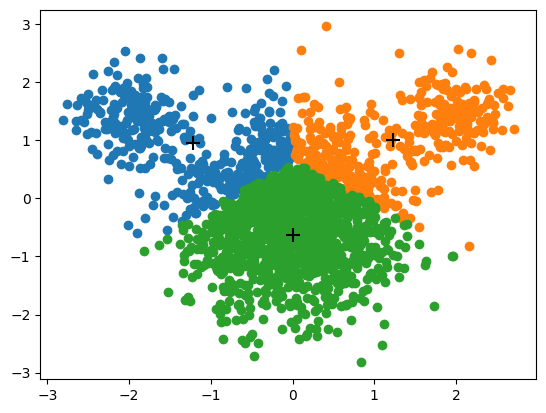

In [13]:
num_clusters = 3
kmeans = KMeansHW(n_clusters=num_clusters)
kmeans.fit(mouse_data)
clusters = [mouse_data[kmeans.labels_ == i] for i in range(num_clusters)]
visualize_clusters(clusters, kmeans.cluster_centers_)

In [23]:
cereal_data = pd.read_csv('dane/cereal.csv')
cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [26]:
cereal_data_prep = cereal_data.drop(columns=['name', 'mfr'])
cereal_data_prep['type'] = cereal_data_prep['type'].map({'C': 0, 'H' : 1})
cereal_data_prep.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [80]:
num_clusters = 3
cereal_data_prep_np = cereal_data_prep.to_numpy()
scaler = StandardScaler().fit(cereal_data_prep_np)
cereal_data_prep_np = scaler.transform(cereal_data_prep_np)
selector = VarianceThreshold(threshold=0.2).fit(cereal_data_prep_np)
print(cereal_data_prep_np.shape)
cereal_data_prep_np = selector.transform(cereal_data_prep_np)
print(cereal_data_prep_np.shape)
kmeans = KMeansHW(n_clusters=num_clusters)
kmeans.fit(cereal_data_prep_np)

(77, 14)
(77, 14)


In [87]:
centroids = scaler.inverse_transform(selector.inverse_transform(kmeans.cluster_centers_))
centroids_df = pd.DataFrame(data=centroids, columns=cereal_data_prep.columns)
centroids_df.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,1.200000e-01,89.200000,3.280000,0.560000,110.000000,3.468000,13.960000,2.960000,120.960000,18.000000,2.080000,0.953200,0.761200,58.868075
1,-1.387779e-17,128.235294,3.117647,2.058824,157.352941,3.294118,14.235294,9.705882,159.117647,32.352941,2.941176,1.202941,0.701765,37.306830
2,-1.387779e-17,109.142857,1.742857,0.828571,196.285714,0.657143,15.228571,8.400000,47.685714,33.571429,1.942857,1.000000,0.921714,33.695466


In [67]:
cereal_data['cluster'] = kmeans.labels_
cereal_data.sort_values('cluster').groupby('cluster').head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
22,Crispy Wheat & Raisins,G,C,100,2,1,140,2.0,11.0,10,120,25,3,1.00,0.75,36.176196,0
59,Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1.00,0.50,39.703400,0
58,Raisin Bran,K,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,0.75,39.259197,0
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,1
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,1
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,1
47,Multi-Grain Cheerios,G,C,100,2,1,220,2.0,15.0,6,90,25,1,1.00,1.00,40.105965,2
48,Nut&Honey Crunch,K,C,120,2,1,190,0.0,15.0,9,40,25,2,1.00,0.67,29.924285,2
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.00,0.67,49.787445,2
